In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x= np.array([[151],[174],[138],[186],[128],[136],[179],[163],[152],[131]])    #heights in cms  2-D array
y=np.array([63,81,56,91,47,57,76,72,62,48]) # weights in kgs

In [11]:
x

array([[151],
       [174],
       [138],
       [186],
       [128],
       [136],
       [179],
       [163],
       [152],
       [131]])

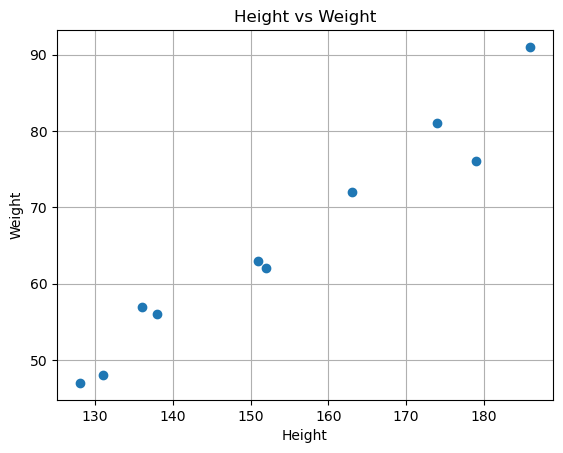

In [12]:
plt.title('Height vs Weight')
plt.grid()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x,y)


In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [21]:
# Train the Algo
regressor.fit(x,y)   # x=input, y=output

LinearRegression()

In [22]:
# value of m
regressor.coef_

array([0.67461045])

In [23]:
#value of c
regressor.intercept_

-38.45508707607698

In [30]:
y_new=x*regressor.coef_ + regressor.intercept_

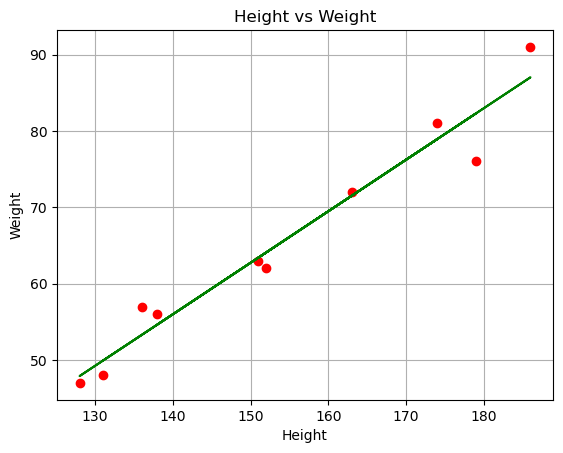

In [31]:
plt.title('Height vs Weight')
plt.grid()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x,y, color= 'red')
plt.plot(x,y_new, color='green')

In [32]:
import pandas as pd

In [34]:
result =pd.DataFrame({
    'actual' : y,
    'predicted' : y_new.flatten()
})
result

,actual,predicted
0,63,63.411091
1,81,78.927131
2,56,54.641155
3,91,87.022456
4,47,47.895050
5,57,53.291934
6,76,82.300183
7,72,71.506416
8,62,64.085701
9,48,49.918882


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('datasets/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
#Separate the input and output Variable
x=df[['YearsExperience']]
y=df['Salary']

In [9]:
x.shape

(30, 1)

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


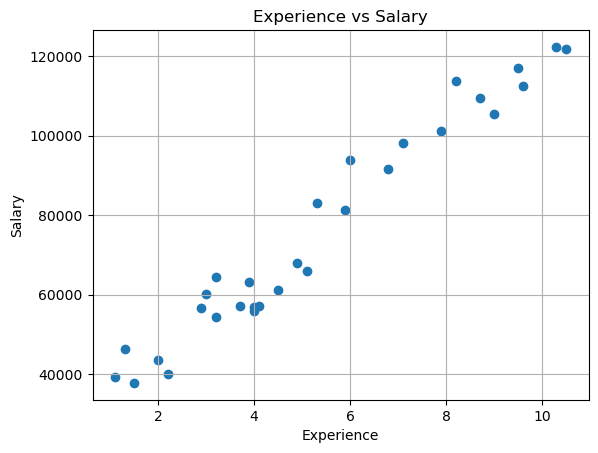

In [12]:
plt.title('Experience vs Salary')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y)

#### Cross Validation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# split the data in training 75% and testing 25%
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [15]:
x_train.shape

(22, 1)

In [16]:
x_test.shape

(8, 1)

In [17]:
y_train.shape

(22,)

In [18]:
y_test.shape

(8,)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor= LinearRegression()

In [21]:
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
regressor.coef_ , regressor.intercept_

(array([9379.71049195]), 26986.691316737248)

In [23]:
regressor.predict([[12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [24]:
regressor.predict([[10.5]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([125473.65148217])

In [25]:
x_test, y_test

(    YearsExperience
 2               1.5
 28             10.3
 13              4.1
 10              3.9
 26              9.5
 24              8.7
 27              9.6
 11              4.0,
 2      37731.0
 28    122391.0
 13     57081.0
 10     63218.0
 26    116969.0
 24    109431.0
 27    112635.0
 11     55794.0
 Name: Salary, dtype: float64)

In [26]:
# Predict on the test data
y_pred=regressor.predict(x_test)
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [27]:
result=pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})
result

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [28]:
result=pd.DataFrame({
    'x':x_test['YearsExperience'],
    'y':y_test,
    'y^': y_pred,
    'Error':y_pred-y_test,
    'abs(Error)':abs(y_pred-y_test)
})
result

,x,y,y^,Error,abs(Error)
2,1.5,37731.0,41056.257055,3325.257055,3325.257055
28,10.3,122391.0,123597.709384,1206.709384,1206.709384
13,4.1,57081.0,65443.504334,8362.504334,8362.504334
10,3.9,63218.0,63567.562235,349.562235,349.562235
26,9.5,116969.0,116093.940990,-875.059010,875.059010
24,8.7,109431.0,108590.172597,-840.827403,840.827403
27,9.6,112635.0,117031.912039,4396.912039,4396.912039
11,4.0,55794.0,64505.533285,8711.533285,8711.533285


In [33]:
#mean absolute error
result['abs(Error)'].mean()

3508.5455930660555

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3508.5455930660555

In [34]:
result=pd.DataFrame({
    'x':x_test['YearsExperience'],
    'y':y_test,
    'y^': y_pred,
    'Error':y_pred-y_test,
    'Error^2':(y_pred-y_test)**2
})
result

,x,y,y^,Error,Error^2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [37]:
#RMSE
result['Error^2'].mean()

22407940.143340684

In [36]:
np.sqrt(result['Error^2'].mean())

4733.70258289858

In [38]:
#RSquared Error
mean_val=np.mean(y_test)

In [39]:
mean_val

84406.25

In [40]:
num=np.sum((y_test-mean_val)**2)- np.sum((y_test-y_pred)**2)
r2=num/np.sum((y_test-mean_val)**2)
r2

0.9779208335417601

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9779208335417602

In [42]:
regressor.score(x_test, y_test)

0.9779208335417602

In [44]:
regressor.score(x,y)

0.955975487542377

In [45]:
regressor.score(x_train,y_train)

0.9395413526983522

In [47]:
# Visualize
y_pred=regressor.predict(x)

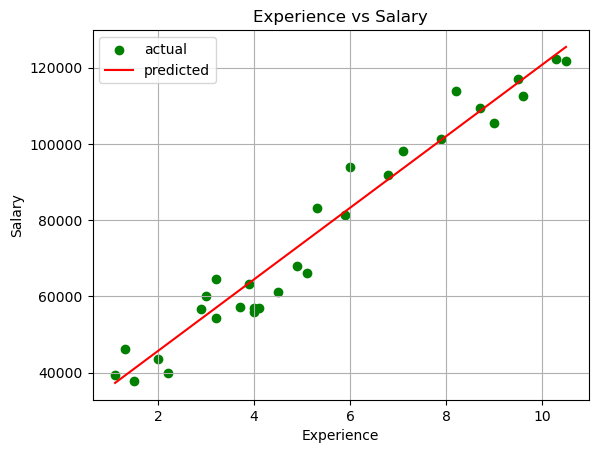

In [54]:
plt.title('Experience vs Salary')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color= 'green', label='actual')
plt.plot(x,y_pred, color='red', label='predicted')
plt.legend()

In [55]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.05754512646779697

In [57]:
exp= float(input('Enter Experience in Years= '))
exp=pd.DataFrame({'YearsExperience':[exp]})
sal=regressor.predict(exp)
print('Expected Salary will be= ',sal[0])

Enter Experience in Years=  8


Expected Salary will be=  102024.37525230538
